In [ ]:
import pandas as pd  # Data manipulation using DataFrames
import numpy as np  # Numerical operations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Standardizing numerical features
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
import xgboost as xgb  # Gradient Boosting
from sklearn.model_selection import cross_val_score, KFold  # Cross-Validation
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.metrics import roc_curve, auc  # Receiver Operating Characteristic (ROC) curve
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE # Handling Imbalanced Classes

In [ ]:
pip install xgboost

In [ ]:
pip install imbalanced-learn


In [ ]:
# Reading the cleaned credit data from a CSV file saved in the notebook 1
Credit_data_cleaned = pd.read_csv('/content/Credit_data_cleaned_ML.csv')

In [ ]:
Credit_data_cleaned.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Family_Members', 'Label', 'Birthdate', 'Age',
       'Employment_startdate', 'Employed_Years', 'Age_Category'],
      dtype='object')

# Scaling the Data

In [ ]:
# Defining features for model training
features = ['Employed_Years', 'Annual_income', 'Age', 'Type_Income', 'Education', 'Marital_status']
X = Credit_data_cleaned[features]
y = Credit_data_cleaned['Label']

# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 552 to 860
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employed_Years  837 non-null    float64
 1   Annual_income   837 non-null    float64
 2   Age             837 non-null    int64  
 3   Type_Income     837 non-null    int64  
 4   Education       837 non-null    int64  
 5   Marital_status  837 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 45.8 KB
None


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Use OneHotEncoder for categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Check if there are any categorical columns
if len(categorical_columns) > 0:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse_output instead of sparse

    # Fit and transform categorical data
    X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
    X_test_encoded = encoder.transform(X_test[categorical_columns])

    # Drop original categorical columns and concatenate encoded columns
    X_train = pd.concat([X_train.drop(columns=categorical_columns),
                         pd.DataFrame(X_train_encoded)], axis=1)
    X_test = pd.concat([X_test.drop(columns=categorical_columns),
                        pd.DataFrame(X_test_encoded)], axis=1)
else:
    print("No categorical columns found in the data.")


No categorical columns found in the data.


In [ ]:
X_train['Type_Income'] = X_train['Type_Income'].map({'Working': 1, 'Not Working': 0})
X_test['Type_Income'] = X_test['Type_Income'].map({'Working': 1, 'Not Working': 0})


# Model Training

### 1. Logistic Regression

##### 1.1 Model training

In [ ]:
# Creating and fitting the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

#### 1.2 Model Prediction and Accuracy

In [ ]:
# Making predictions on the training set
y_train_pred_lr = lr_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
print(f"Calculating training accuracy: {train_accuracy:.2f}")

# Making predictions on the test set
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
print(f"Calculating testing accuracy: {test_accuracy:.2f}")

Calculating training accuracy: 0.91
Calculating testing accuracy: 0.87


#### 1.3 Confusion Matrix

<Figure size 800x600 with 0 Axes>

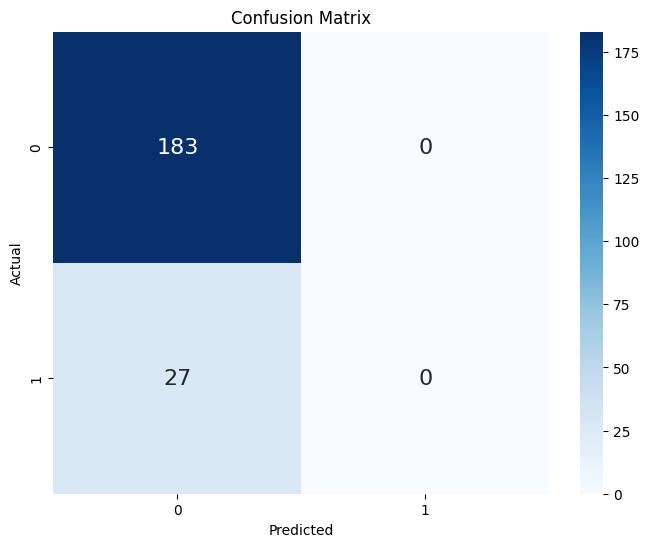

In [ ]:
# Calculating the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

#### 1.4 Classification Report

In [ ]:

# Evaluating the performance of the model
class_report_lr = classification_report(y_test, y_test_pred_lr)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       183
           1       0.00      0.00      0.00        27

    accuracy                           0.87       210
   macro avg       0.44      0.50      0.47       210
weighted avg       0.76      0.87      0.81       210



#### 1.5 Roc Curve (Receiver Operating Characteristic)

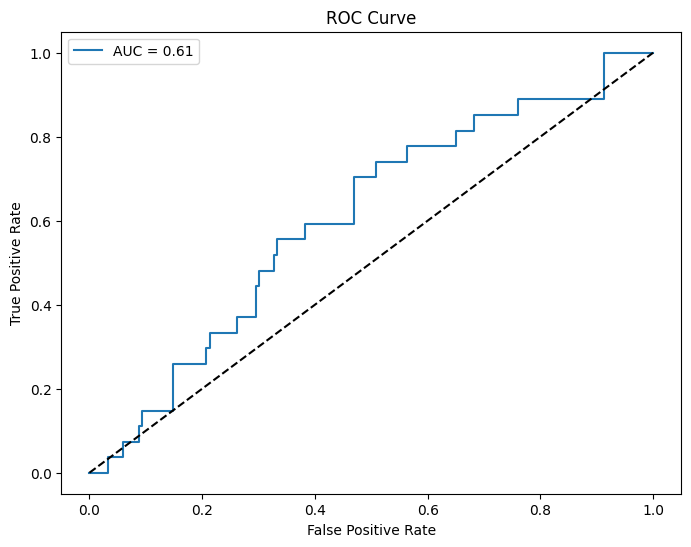

In [ ]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve)
roc_auc_lr = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### 1.6 Cross Validation

In [ ]:
# Creating a cross-validation object
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Logistic Regression model
cross_val_accuracy_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (LR): {cross_val_accuracy_lr}")

# Calculating the mean cross-validation accuracy for Logistic Regression
print(f"Mean Cross-Validation Accuracy (LR): {np.mean(cross_val_accuracy_lr):.2f}")

Cross-Validation Accuracy (LR): [0.91071429 0.9047619  0.89221557 0.92215569 0.91616766]
Mean Cross-Validation Accuracy (LR): 0.91


#### 1.7 Hyperparameter Tuning: GridSearchCV

In [ ]:

# Setting up the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjusting the regularization parameter
    'max_iter': [100, 200, 300],  # Setting the maximum number of iterations
}

# Setting up GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_lr = grid_search_lr.best_params_
print("Best Parameters (Logistic Regression):", best_params_lr)

Best Parameters (Logistic Regression): {'C': 0.001, 'max_iter': 100}


#### 1.8 Model with Best Parameters

In [ ]:
# Defining the best hyperparameters for Logistic Regression
best_params_lr = {'C': 0.001, 'max_iter': 100}

# Creating the Logistic Regression model with the best hyperparameters
best_lr_model = LogisticRegression(**best_params_lr, random_state=42)
best_lr_model.fit(X_train_scaled, y_train)
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Calculating the accuracy of the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (LR): {accuracy_lr:.2f}")

Accuracy (LR): 0.87


# 2. Decision Tree Classifier

#### In decision tree models, normalization is not necessary. Decision trees are not sensitive to the scale of the features.


#### 2.1 Model training

In [ ]:
# Creating and fitting the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 2.2 Model Prediction and Accuracy

In [ ]:

# Making predictions on the training set
y_pred_dt = dt_model.predict(X_test)

# Calculating testing accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

Accuracy: 0.85


In [ ]:
# 2.3 Confusion Matrix

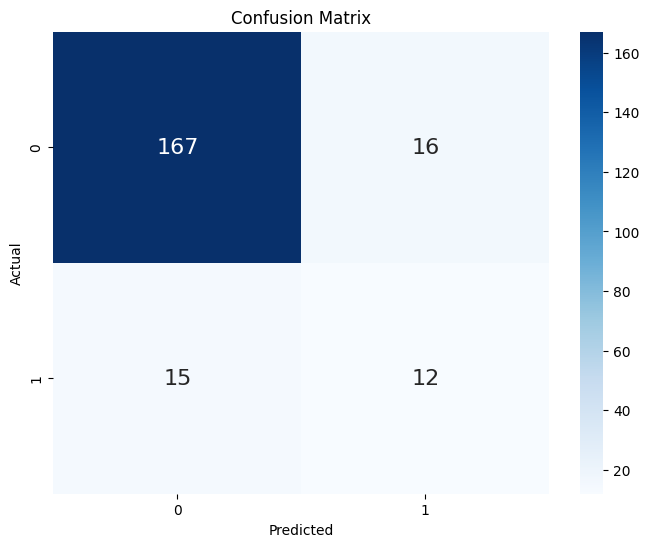

In [ ]:

# Calculating the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

In [ ]:
# 2.4 Classification Report

In [ ]:
# Evaluating the performance of the model
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       183
           1       0.43      0.44      0.44        27

    accuracy                           0.85       210
   macro avg       0.67      0.68      0.68       210
weighted avg       0.85      0.85      0.85       210



In [ ]:
# 2.5 Roc Cruve (Receiver Operating Characteristic)

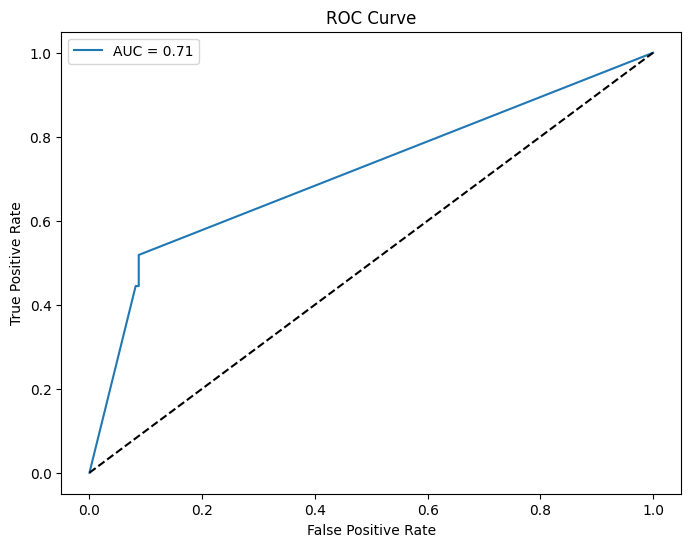

In [ ]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Calculating AUC (Area Under the ROC Curve)
roc_auc_dt = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# 2.6 Cross Validation

In [ ]:

# Creating a cross-validation object
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Decision Tree model
cross_val_accuracy_dt = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (DT): {cross_val_accuracy_dt}")

# Calculating the mean cross-validation accuracy for Decision Tree model
print(f"Mean Cross-Validation Accuracy (DT): {np.mean(cross_val_accuracy_dt):.2f}")

Cross-Validation Accuracy (DT): [0.88095238 0.88095238 0.8502994  0.8742515  0.89221557]
Mean Cross-Validation Accuracy (DT): 0.88


In [ ]:

# 2.7 Hyperparameter Tuning: GridSearchCV

In [ ]:

# Setting up the parameter grid for grid search
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Setting up GridSearchCV for Decision Tree model
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_dt.fit(X_train, y_train)

# Retrieving the best parameters from the grid search
best_params_dt = grid_search_dt.best_params_
print("Best Parameters (Decision Tree):", best_params_dt)


Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:

# 2.8 Model with Best Parameters

In [ ]:
# Defining the best hyperparameters for Decision Tree model
best_params_dt = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Creating the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_model.fit(X_train_scaled, y_train)
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Calculating the accuracy of the Decision Tree model
accuracy_dt_bp = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (DT): {accuracy_dt_bp:.2f}")

Accuracy (DT): 0.85


# 3. K-Nearest Neighbors (KNN)

In [ ]:
# 5.1 Model training

In [ ]:
# Creating and fitting the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 5.2 Model Prediction and Accuracy

In [ ]:

# Making predictions on the training set
y_train_pred_knn = knn_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print(f"Training Accuracy (KNN): {train_accuracy_knn:.2f}")

# Making predictions on the test set
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Testing Accuracy (KNN): {test_accuracy_knn:.2f}")

Training Accuracy (KNN): 0.94
Testing Accuracy (KNN): 0.88


In [ ]:

# 5.3 Confusion Matrix

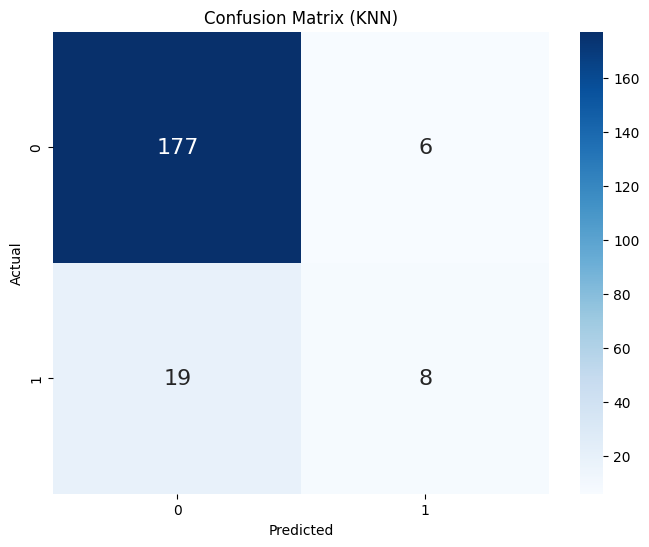

In [ ]:
# Calculating the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

In [ ]:
# 5.4 Classification Report

In [ ]:
# Evaluating the performance of the model
class_report_knn = classification_report(y_test, y_test_pred_knn)
print("Classification Report (KNN):\n", class_report_knn)

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       183
           1       0.57      0.30      0.39        27

    accuracy                           0.88       210
   macro avg       0.74      0.63      0.66       210
weighted avg       0.86      0.88      0.86       210



In [ ]:
# 5.5 Roc Cruve (Receiver Operating Characteristic)

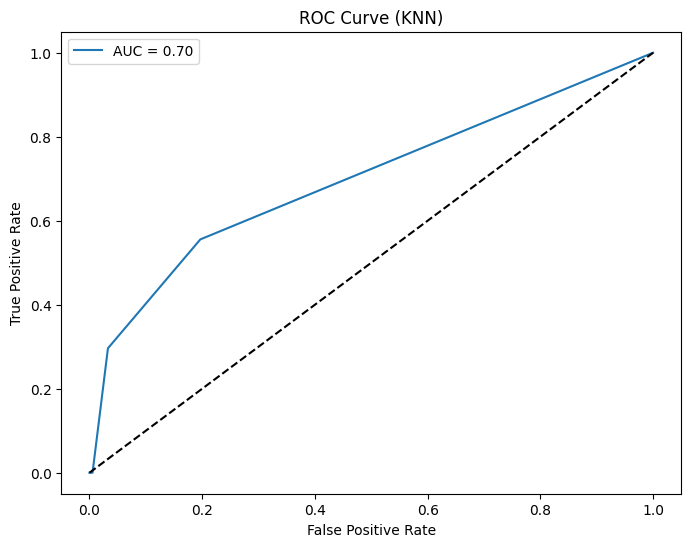

In [ ]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# 5.6 Cross Validation

In [ ]:
# Creating a cross-validation object
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for KNN
cross_val_accuracy_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (KNN): {cross_val_accuracy_knn}")

# Calculating the mean cross-validation accuracy for KNN
print(f"Mean Cross-Validation Accuracy (KNN): {np.mean(cross_val_accuracy_knn):.2f}")

Cross-Validation Accuracy (KNN): [0.89880952 0.89880952 0.85628743 0.91616766 0.90419162]
Mean Cross-Validation Accuracy (KNN): 0.89


In [ ]:

# 5.7 Hyperparameter Tuning: GridSearchCV

In [ ]:

# Setting up the parameter grid for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Setting up GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_knn.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_knn = grid_search_knn.best_params_
print("Best Parameters (KNN):", best_params_knn)

Best Parameters (KNN): {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [ ]:

# 5.8 Model with Best Parameters

In [ ]:

# Defining the best hyperparameters for KNN model
best_params_knn = {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

# Creating the KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train_scaled, y_train)
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Calculating the accuracy of the KNN model
accuracy_knn_bp = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn_bp:.2f}")

Accuracy (KNN): 0.90


# Model Selection

In [ ]:
variables = {
    'Logistic Regression': [test_accuracy, accuracy_lr, cross_val_accuracy_lr, roc_auc_lr],
    'Decision Tree': [accuracy_dt, accuracy_dt_bp, cross_val_accuracy_dt, roc_auc_dt],
    'K-Nearest Neighbour': [test_accuracy_knn, accuracy_knn_bp, cross_val_accuracy_knn, roc_auc_knn]
}

# Calculate mean for the "Mean Cross-Validation Accuracy" column
for model, vars_list in variables.items():
    vars_list[2] = sum(vars_list[2]) / len(vars_list[2])

# Convert the dictionary to a DataFrame
model_selection_df = pd.DataFrame.from_dict(variables, orient='index', columns=['Testing Accuracy before Hypertuning', 'Testing Accuracy after Hypertuning', ' Accuracy', 'AUC'])

# Format all values to two decimal places
model_selection_df = model_selection_df.applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)

# Display the results
model_selection_df

,Testing Accuracy before Hypertuning,Testing Accuracy after Hypertuning,Accuracy,AUC
Logistic Regression,0.87,0.87,0.91,0.61
Decision Tree,0.85,0.85,0.88,0.71
K-Nearest Neighbour,0.88,0.90,0.89,0.70
